In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
data = pd.read_csv('cwurData.csv')

# Создание таблицы Университетов (Universities)
universities = data[['institution', 'country', 'national_rank']].copy()
universities.drop_duplicates(subset=['institution'], inplace=True)
universities.reset_index(drop=True, inplace=True)

# Создание таблицы Рейтингов (Rankings)
rankings = data[['institution', 'world_rank', 'quality_of_education', 'alumni_employment',
                 'quality_of_faculty', 'publications', 'influence', 'citations',
                 'broad_impact', 'patents', 'score']].copy()

# Сохранение таблиц в файлы CSV
universities.to_csv('universities.csv', index=False)
rankings.to_csv('rankings.csv', index=False)


# Первые 100 элементов из каждой таблицы
universities_subset = universities.head(100)
rankings_subset = rankings.head(100)

data_subset = data.head(100)


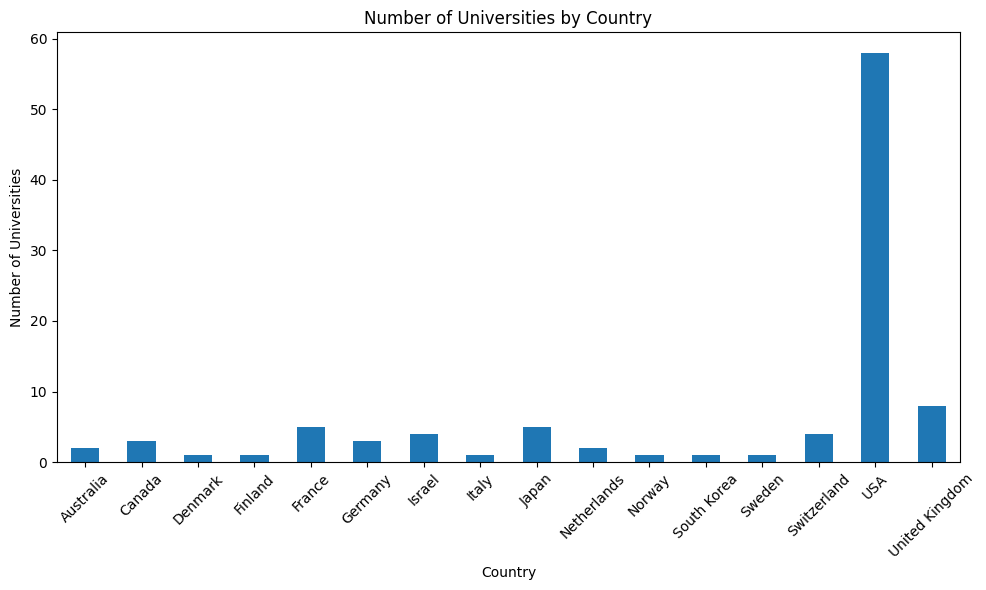

In [ ]:
#Кластеризованная столбчатая диаграмма для пары качественный атрибут — качественный атрибут:
plt.figure(figsize=(10, 6))
universities_subset.groupby('country')['national_rank'].count().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.title('Number of Universities by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('clustered_bar_chart_qual_qual.png')
plt.show()


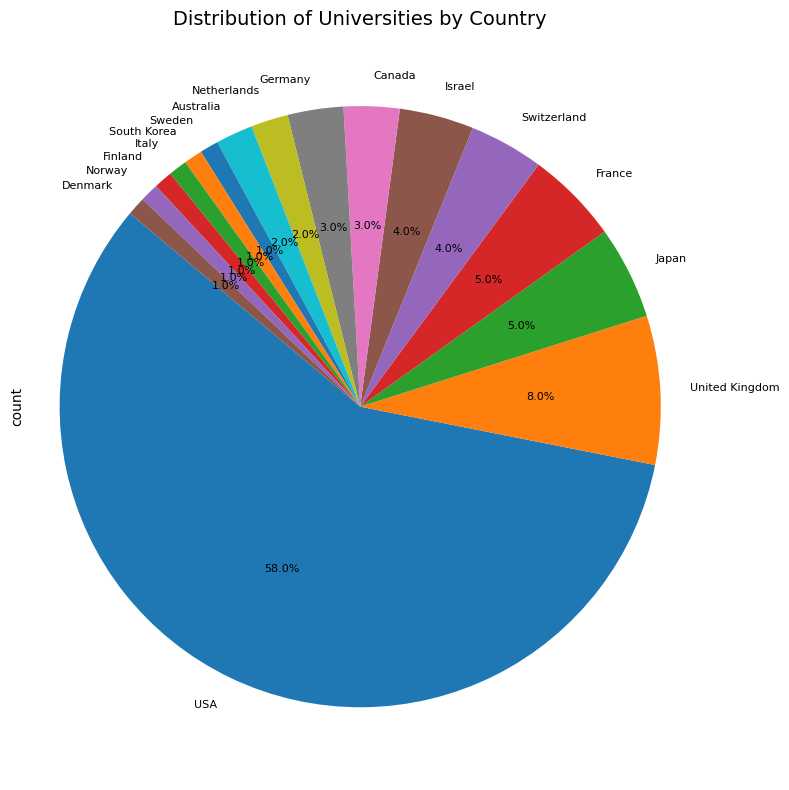

In [ ]:
plt.figure(figsize=(8, 8))
universities_subset['country'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, fontsize=8)
plt.axis('equal')
plt.title('Distribution of Universities by Country', fontsize=14)
plt.tight_layout()
plt.savefig('pie_chart_qual_qual.png')
plt.show()


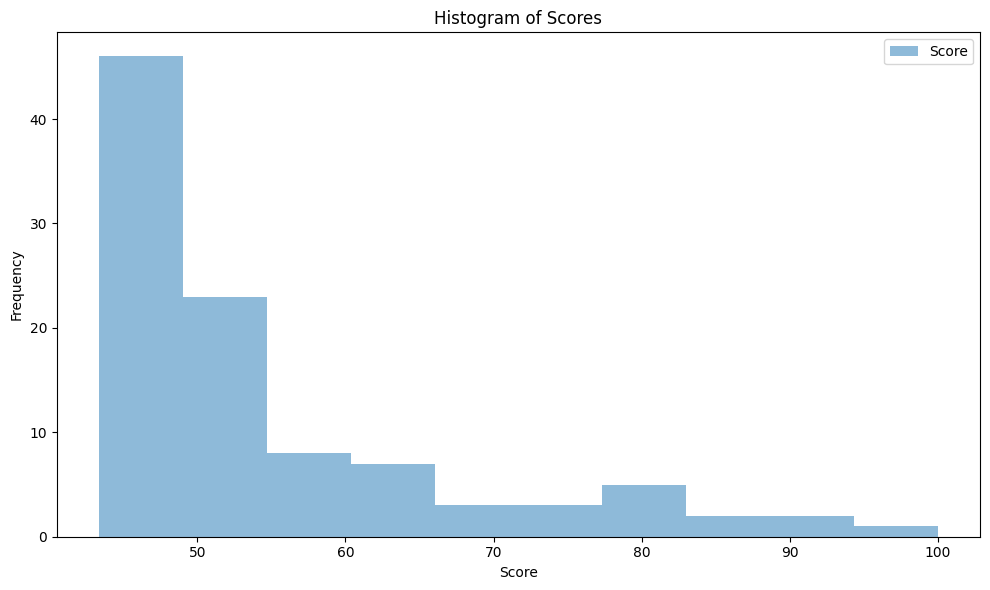

In [ ]:
#Категоризированная гистограмма для пары количественный атрибут — качественный атрибут:
plt.figure(figsize=(10, 6))
plt.hist(rankings_subset['score'], bins=10, alpha=0.5, label='Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.legend()
plt.tight_layout()
plt.savefig('categorized_histogram_quant_qual.png')
plt.show()


<Figure size 1600x1000 with 0 Axes>

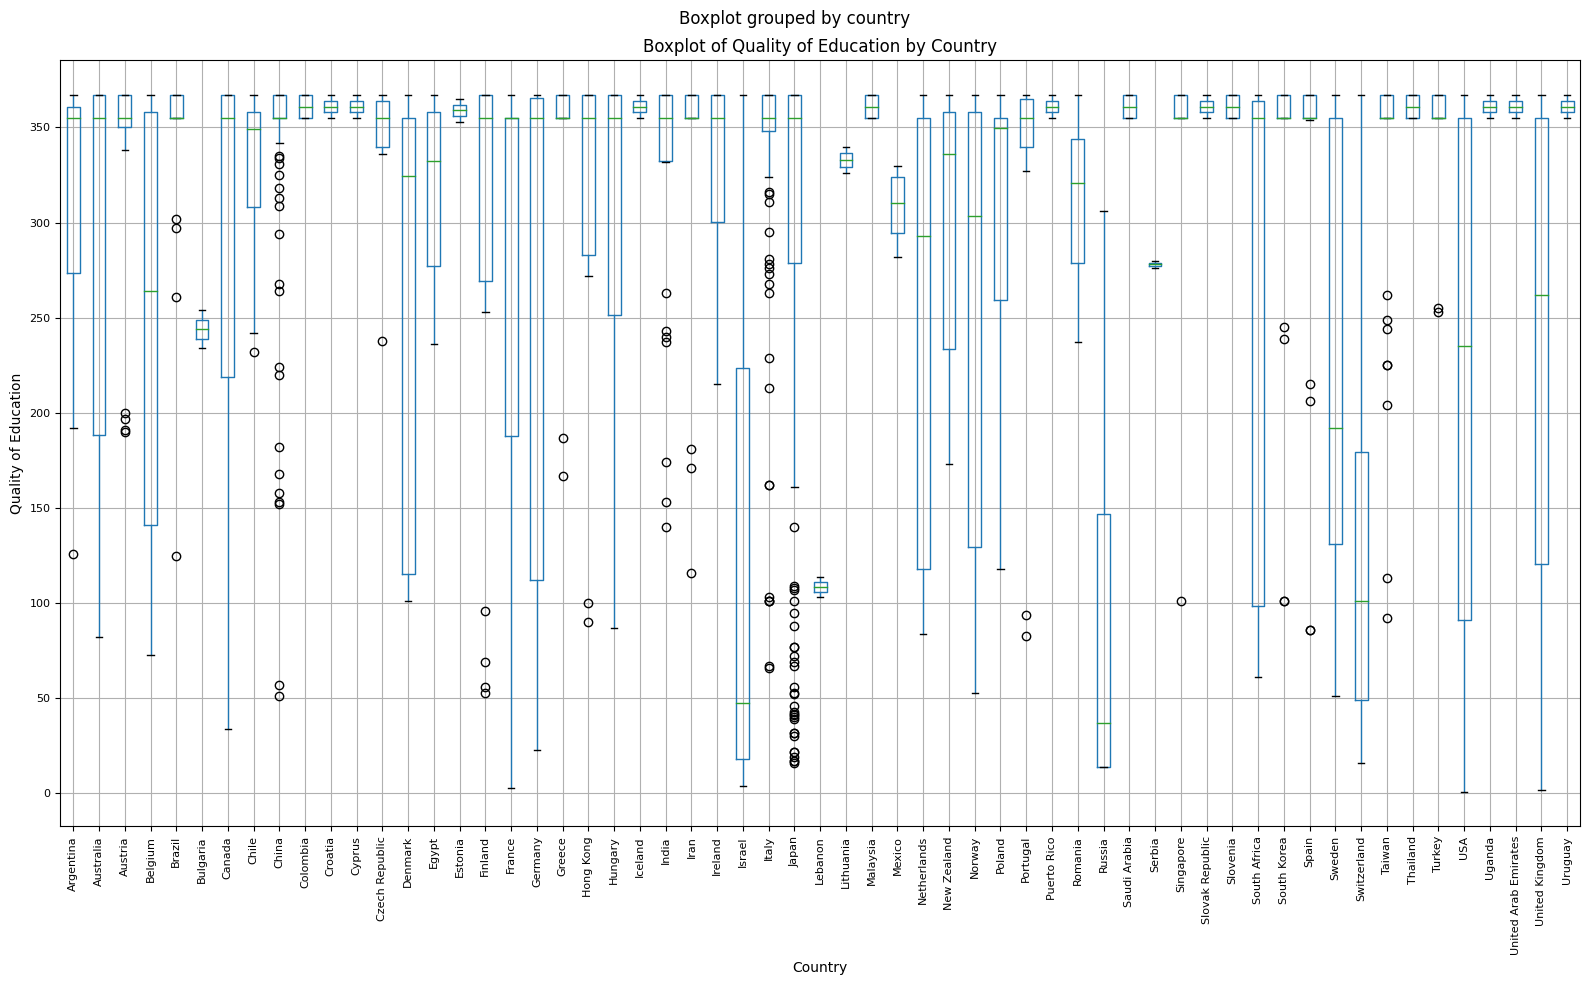

In [ ]:
universities = data[['institution', 'country', 'national_rank']].copy()
universities.drop_duplicates(subset=['institution'], inplace=True)
universities.reset_index(drop=True, inplace=True)

rankings = data[['institution', 'country', 'quality_of_education']].copy()

universities.to_csv('universities.csv', index=False)
rankings.to_csv('rankings.csv', index=False)

universities_subset = universities.head(100)
rankings_subset = rankings.head(100)

plt.figure(figsize=(16, 10))
boxplot = rankings.boxplot(column='quality_of_education', by='country', figsize=(16,10), rot=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Quality of Education', fontsize=10)
plt.title('Boxplot of Quality of Education by Country', fontsize=12)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tight_layout()
plt.savefig('categorized_boxplot_quality_education_by_country.png')
plt.show()

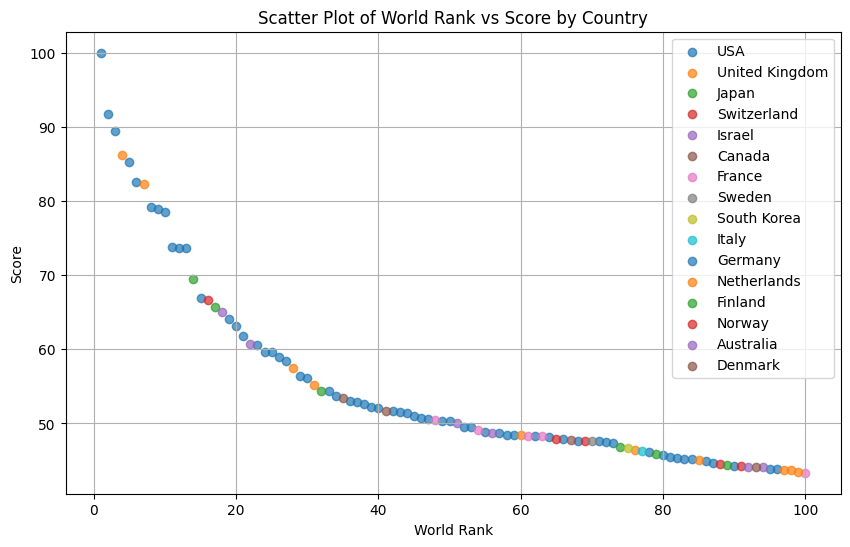

In [ ]:
plt.figure(figsize=(10, 6))
for country in data_subset['country'].unique():
    subset = data_subset[rankings_subset['country'] == country]
    plt.scatter(subset['world_rank'], subset['score'], label=country, alpha=0.7)
plt.xlabel('World Rank')
plt.ylabel('Score')
plt.title('Scatter Plot of World Rank vs Score by Country')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:

#точка представляет университет. Цвет - страна.
# Графический отчет "категоризированная диаграмма рассеивания" для двух количественных атрибутов и одного качественного атрибута
plt.figure(figsize=(10, 6))
colors = pd.factorize(data_subset['country'])[0]  # Цветовая кодировка для каждой страны
plt.scatter(rankings_subset['quality_of_education'], rankings_subset['alumni_employment'], c=colors, cmap='viridis', alpha=0.5)
plt.xlabel('Quality of Education')
plt.ylabel('Alumni Employment')
plt.title('Categorized Scatterplot: Quality of Education vs Alumni Employment by Country')
plt.colorbar(label='Country')
plt.tight_layout()
plt.savefig('quality_of_education_vs_alumni_employment_by_country_categorized_scatterplot.png')
plt.show()

KeyError: 'alumni_employment'

<Figure size 1000x600 with 0 Axes>

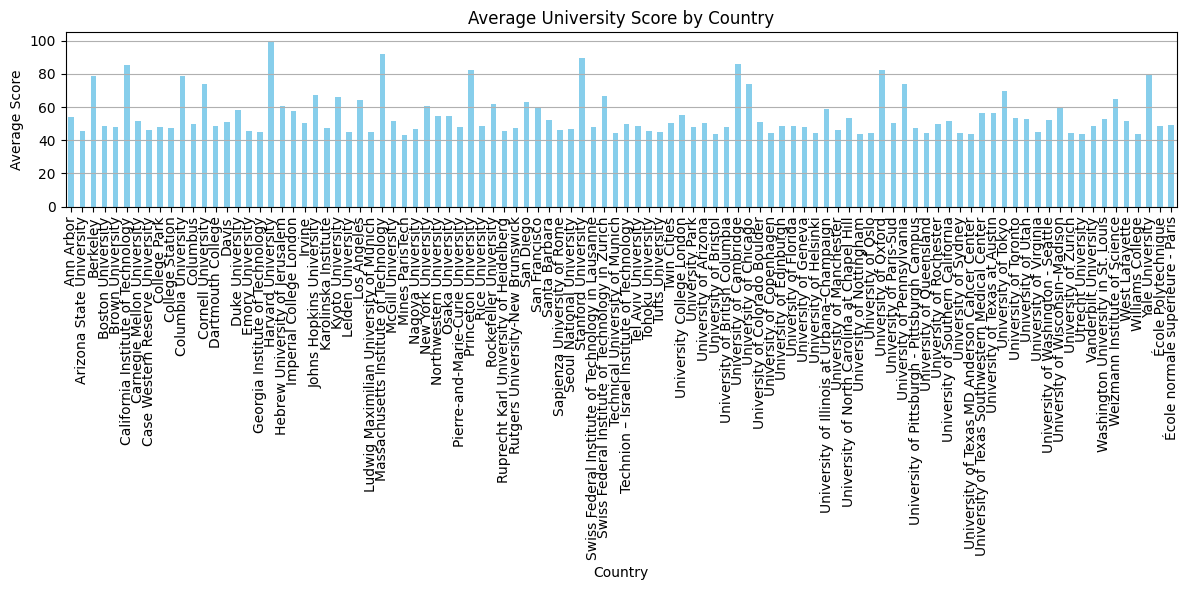

In [ ]:
# Группировка данных по странам и вычисление среднего рейтинга в каждой стране
average_score_by_country = rankings_subset.groupby('country')['score'].mean()

# Построение графика категоризированной гистограммы
plt.figure(figsize=(12, 6))
average_score_by_country.plot(kind='bar', color='skyblue')
plt.title('Average University Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('Average_University_Score_by_Country.png')
plt.show()


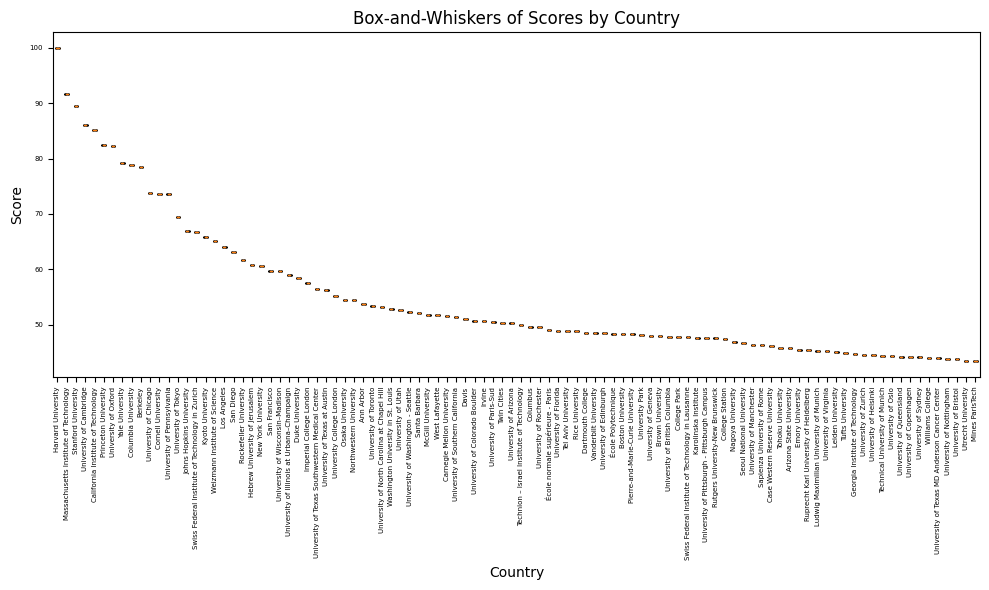

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([rankings_subset[rankings_subset['country'] == country]['score'] for country in rankings_subset['country'].unique()],
            labels=rankings_subset['country'].unique(), notch=True, patch_artist=True)
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Box-and-Whiskers of Scores by Country')
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=5)  # Уменьшаем размер шрифта меток на осях
plt.tight_layout()
plt.savefig('boxplot_quant_qual.png')
plt.show()


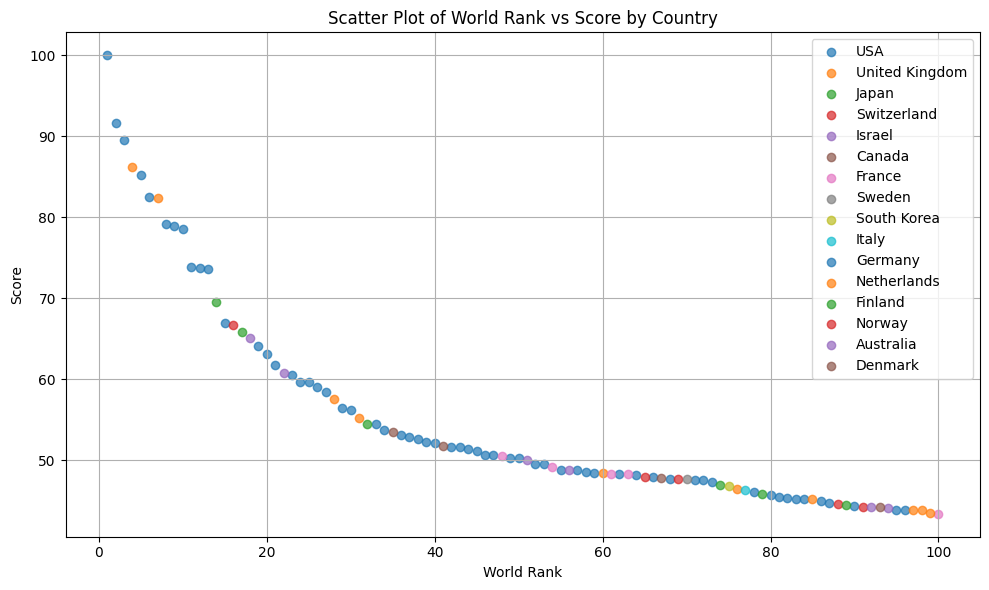

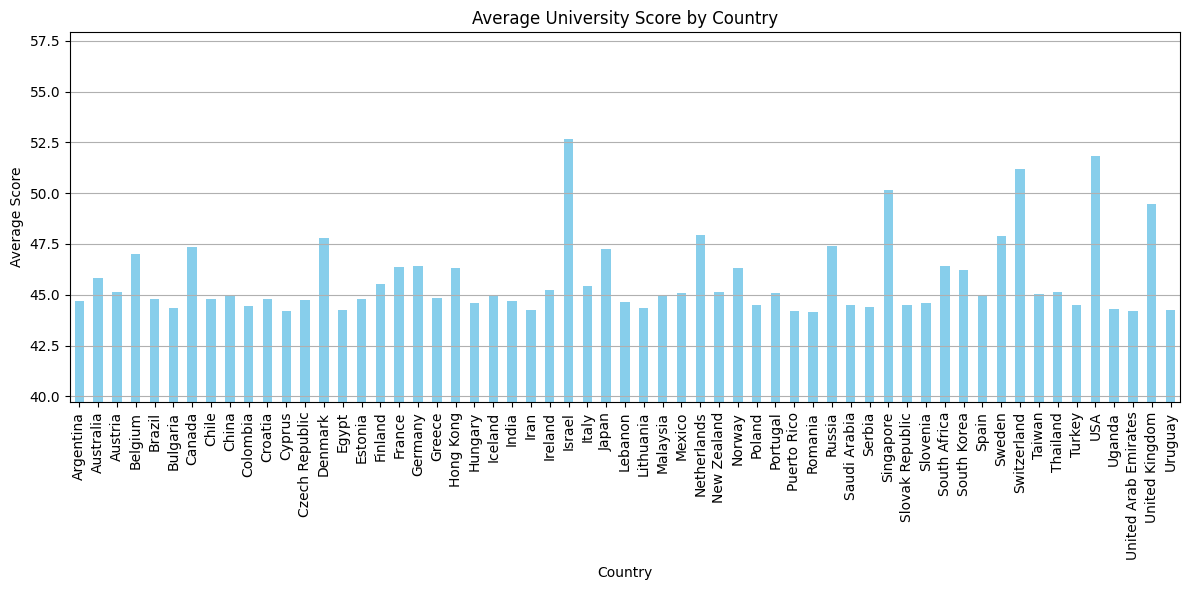

In [ ]:
# Группировка данных по странам и вычисление среднего рейтинга в каждой стране
average_score_by_country = data.groupby('country')['score'].mean()

# Вычисление минимального и максимального среднего
min_score = average_score_by_country.min() * 0.9
max_score = average_score_by_country.max() * 1.1

plt.figure(figsize=(12, 6))
plt.ylim(min_score, max_score)  # Установка пределов по оси y, для лучшей видимости, можно убрать
average_score_by_country.plot(kind='bar', color='skyblue')
plt.title('Average University Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('Average_University_Score_by_Country.png')
plt.show()

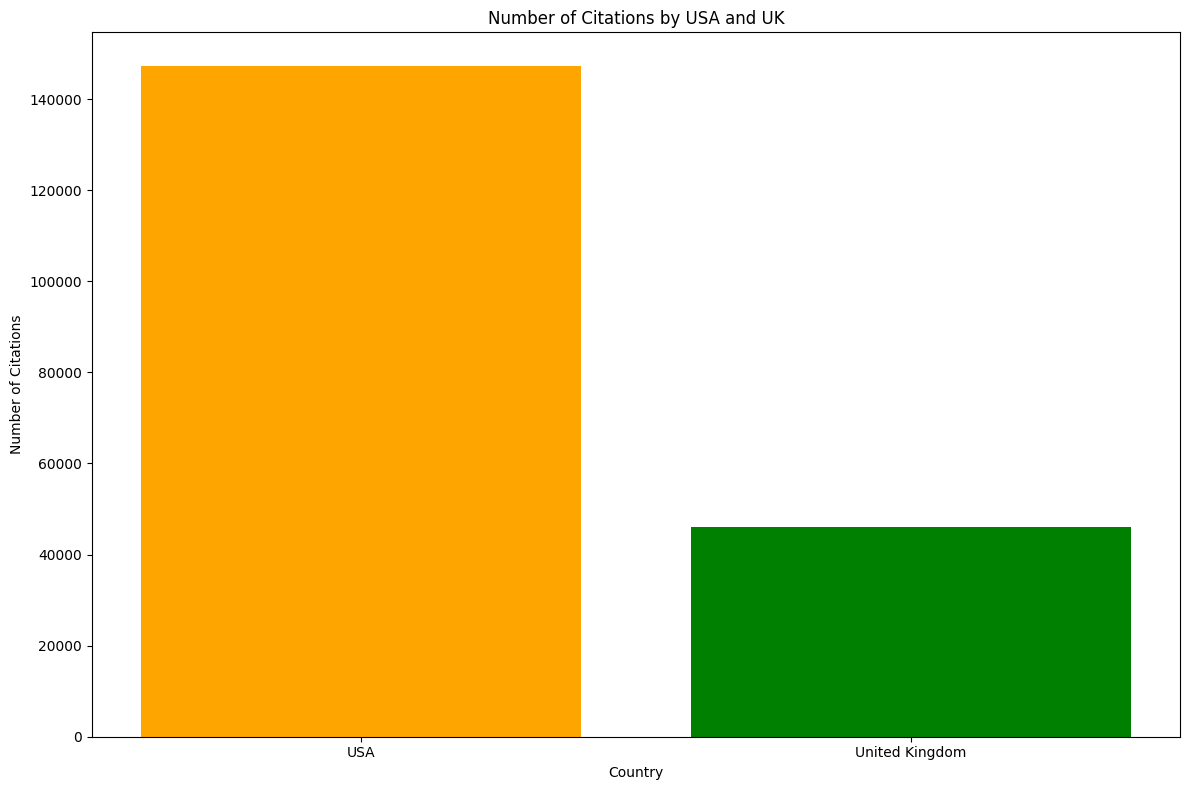

In [ ]:
#Кластеризованная столбчатая диаграмма для пары качественный атрибут — качественный атрибут:

# делим на 2 страны
data_subset_2 = data[data['country'].isin(['USA', 'United Kingdom'])]

# суммируются на каждую страну
citations_count_us = data_subset_2[data_subset_2['country'] == 'USA']['citations'].sum()
citations_count_uk = data_subset_2[data_subset_2['country'] == 'United Kingdom']['citations'].sum()


plt.figure(figsize=(12, 8))
plt.bar(['USA', 'United Kingdom'], [citations_count_us, citations_count_uk], color=['orange', 'green'])
plt.xlabel('Country')
plt.ylabel('Number of Citations')
plt.title('Number of Citations by USA and UK')
plt.tight_layout()
plt.savefig('clustered_bar_citations.png')
plt.show()

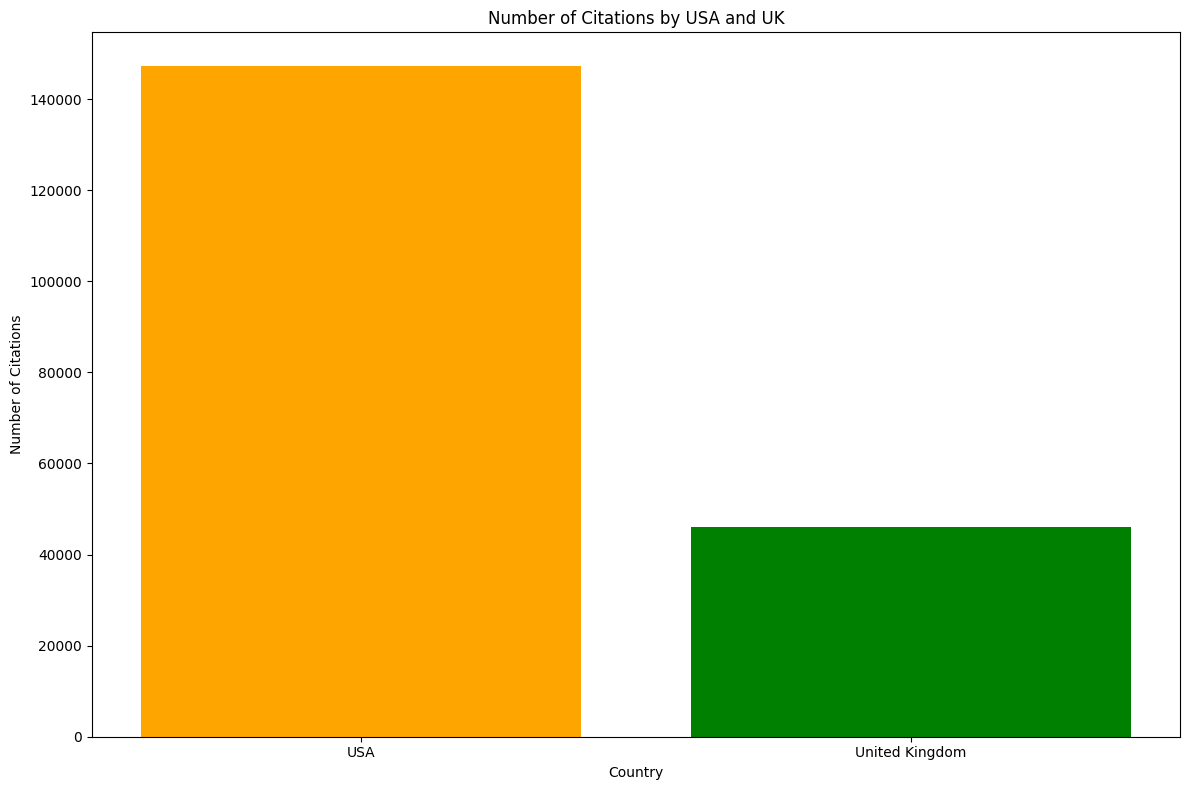

In [ ]:
#Кластеризованная столбчатая диаграмма для пары качественный атрибут — качественный атрибут:

# делим на 2 страны
data_subset_2 = data[data['country'].isin(['USA', 'United Kingdom'])]

# суммируются на каждую страну
citations_count_us = data_subset_2[data_subset_2['country'] == 'USA']['citations'].sum()
citations_count_uk = data_subset_2[data_subset_2['country'] == 'United Kingdom']['citations'].sum()


plt.figure(figsize=(12, 8))
plt.bar(['USA', 'United Kingdom'], [citations_count_us, citations_count_uk], color=['orange', 'green'])
plt.xlabel('Country')
plt.ylabel('Number of Citations')
plt.title('Number of Citations by USA and UK')
plt.tight_layout()
plt.savefig('clustered_bar_citations.png')
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  2 19:44:15 2024

@author: petrm
графики
"""

import pandas as pd
import matplotlib.pyplot as plt
import os

new_directory = os.path.join('..', 'Graphics')
dataset_directory = os.path.join('..', 'Data', 'cwurData.csv')

# Загрузка данных
data = pd.read_csv(dataset_directory)


# Создание таблицы Университетов (Universities)
#universities = data[['institution', 'country', 'national_rank']].copy()
#universities.drop_duplicates(subset=['institution'], inplace=True)
#universities.reset_index(drop=True, inplace=True)

# Создание таблицы Рейтингов (Rankings)
#rankings = data[['institution', 'world_rank', 'quality_of_education', 'alumni_employment',
#                 'quality_of_faculty', 'publications', 'influence', 'citations',
#                 'broad_impact', 'patents', 'score']].copy()

# Сохранение таблиц в файлы CSV
#universities.to_csv('universities.csv', index=False)
#rankings.to_csv('rankings.csv', index=False)


# Первые 100 элементов таблицы, топ 100 вузов
universities_subset = data.head(100)
rankings_subset = data.head(100)


#Кластеризованная столбчатая диаграмма для пары качественный атрибут — качественный атрибут:
plt.figure(figsize=(10, 6))
universities_subset.groupby('country')['national_rank'].count().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.title('Number of Universities by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(new_directory, 'clustered_bar_chart_qual_qual.png'))
plt.show()

#Круговая диаграмма
plt.figure(figsize=(8, 8))
universities_subset['country'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, fontsize=8)
plt.axis('equal')
plt.title('Distribution of Universities by Country', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(new_directory, 'pie_chart_qual_qual.png'))
plt.show()

#Категоризированная гистограмма для пары количественный атрибут — качественный атрибут:
plt.figure(figsize=(10, 6))
plt.hist(rankings_subset['score'], bins=10, alpha=0.5, label='Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(new_directory, 'categorized_histogram_quant_qual.png'))
plt.show()



#для всей таблицы
boxplot = data.boxplot(column='quality_of_education', by='country', figsize=(16,10), rot=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Quality of Education', fontsize=10)
plt.title('Boxplot of Quality of Education by Country', fontsize=12)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tight_layout()
plt.savefig(os.path.join(new_directory, 'categorized_boxplot_quality_education_by_country.png'))
plt.show()



#точка представляет университет. Цвет - страна. Топ 100
# Графический отчет "категоризированная диаграмма рассеивания" для двух количественных атрибутов и одного качественного атрибута
plt.figure(figsize=(10, 6))
colors = pd.factorize(rankings_subset['country'])[0]  # Цветовая кодировка для каждой страны
plt.scatter(rankings_subset['quality_of_education'], rankings_subset['alumni_employment'], c=colors, cmap='viridis', alpha=0.5)
plt.xlabel('Quality of Education')
plt.ylabel('Alumni Employment')
plt.title('Categorized Scatterplot: Quality of Education vs Alumni Employment by Country')
plt.colorbar(label='Country')
plt.tight_layout()
plt.savefig(os.path.join(new_directory, 'quality_of_education_vs_alumni_employment_by_country_categorized_scatterplot.png'))
plt.show()



# Группировка данных по странам и вычисление среднего рейтинга в каждой стране
average_score_by_country = data.groupby('country')['score'].mean()

# Вычисление минимального и максимального среднего
min_score = average_score_by_country.min() * 0.9
max_score = average_score_by_country.max() * 1.1

plt.figure(figsize=(12, 6))
plt.ylim(min_score, max_score)  # Установка пределов по оси y, для лучшей видимости, можно убрать
average_score_by_country.plot(kind='bar', color='skyblue')
plt.title('Average University Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig(os.path.join(new_directory, 'Average_University_Score_by_Country.png'))
plt.show()




plt.figure(figsize=(10, 6))
for country in rankings_subset['country'].unique():
    subset = rankings_subset[rankings_subset['country'] == country]
    plt.scatter(subset['world_rank'], subset['score'], label=country, alpha=0.7)

plt.xlabel('World Rank')
plt.ylabel('Score')
plt.title('Scatter Plot of World Rank vs Score by Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(new_directory, 'scatter_plot.png'))
plt.show()



#Кластеризованная столбчатая диаграмма для пары качественный атрибут — качественный атрибут:
# делим на 2 страны
data_subset_2 = data[data['country'].isin(['USA', 'United Kingdom'])]
# суммируются на каждую страну
citations_count_us = data_subset_2[data_subset_2['country'] == 'USA']['citations'].count()
citations_count_uk = data_subset_2[data_subset_2['country'] == 'United Kingdom']['citations'].count()
plt.figure(figsize=(12, 8))
plt.bar(['USA', 'United Kingdom'], [citations_count_us, citations_count_uk], color=['orange', 'green'])
plt.xlabel('Country')
plt.ylabel('Number of Citations')
plt.title('Number of Citations by USA and UK')
plt.tight_layout()
plt.savefig(os.path.join(new_directory, 'clustered_bar_citations.png'))
plt.show()